¡Hola,María!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola María! Has hecho un excelente trabajo, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

                    ICE ONLINE

                            by: Maria de los Angeles

In [ ]:
from scipy import stats 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid", palette="pastel")

             PREPARACION DE DATOS:

In [1]:
games=pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


                PROBLEMAS DETECTADOS 
Al  cargar el data set se identificaron los siguientes problemas:

1-.la columna year_of_release tiene valores faltantes, tambien aparece como float y deberia ser int.

2-.Critic_Score tambien presenta muchos valores nulos 

3-. User_Score es de tipo object cuando debe ser tipo numerico

4-.Rating tiene de valores faltantes.

PARA PREPARAR LOS DATOS HAREMOS LO SIGUIENTE:
*tratar los valores nulos
*convertir los tipos de datos
*estandarizacion y limpieza en las columnas 
*verificacion de duplicados 


In [3]:
games.columns = games.columns.str.lower()
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
games['user_score']=games['user_score'].replace('tdb', pd.NA)

In [5]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce')

In [6]:
games = games.dropna(subset=['year_of_release'])

In [7]:
games['user_score'] = games['user_score'].fillna(games['user_score'].mean())

In [8]:
games['critic_score'] = games['critic_score'].astype('Int64')

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [10]:
games.duplicated().sum()
games= games.drop_duplicates().reset_index(drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [11]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,16446.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,68.994363,7.126330
std,5.877050,0.818416,0.506696,0.311082,0.187994,13.920060,1.010047
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,7.126330
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.126330
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Se realizaron conversiones de tipo en las columnas year_of_release, user_score y critic_score para adecuarlas al análisis. El año de lanzamiento se transformó a tipo entero para reflejar correctamente los años, permitiendo valores nulos con Int64. La puntuación de usuarios (user_score) se encontraba como texto debido a valores como 'tbd', por lo que se reemplazaron estos casos por NaN y se convirtió a float64 para permitir el uso estadístico. Finalmente, critic_score se ajustó a Int64 para reflejar que son valores enteros, manteniendo compatibilidad con nulos.

In [12]:
games['total_sales'] = (
    games['na_sales'] +
    games['eu_sales'] +
    games['jp_sales'] +
    games['other_sales']
)

In [13]:
games[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 


             ANALISIS DE DATOS:

In [14]:
games_per_year = games['year_of_release'].value_counts().sort_index()
display(games_per_year)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

In [15]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(platform_sales)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [16]:
top_platforms = platform_sales.head(6).index
print(top_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')


In [17]:
top_games = games[games['platform'].isin(top_platforms)]

In [18]:
sales_by_year_platform = top_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
display(sales_by_year_platform)

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,NaN,NaN,NaN


In [19]:
relevant_games = games[(games['year_of_release'] >= 2010) & (games['year_of_release'] <= 2016)]

en base al analisis de los resultados anteriores tome en cuenta a partir del 2010, porque antes de ese año los numeros no eran relevantes y muchas plataformas ya estaban en declive, con un periodo maximo de 6 años es mas que suficiente para hacer un analisis y poder organizar el siguiente año  con buenas bases.

In [20]:
platform_sales = relevant_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(platform_sales)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: total_sales, dtype: float64

In [21]:
top_platforms = platform_sales.head(6).index
filtered_top = relevant_games[relevant_games['platform'].isin(top_platforms)]
sales_trend = filtered_top.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

<Figure size 1400x600 with 0 Axes>

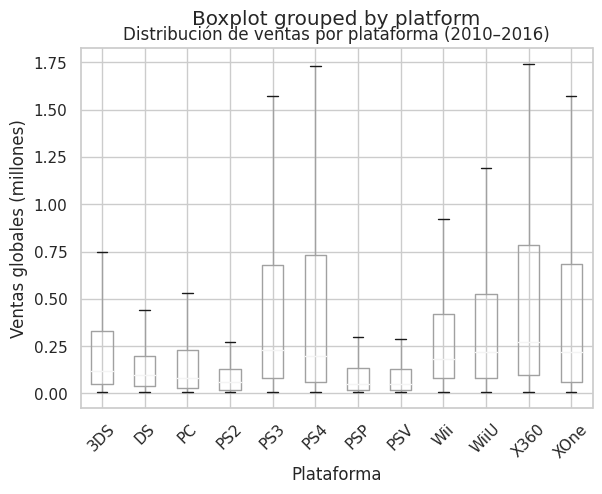

In [22]:
plt.figure(figsize=(14, 6))
relevant_games.boxplot(column='total_sales', by='platform', showfliers=False)
plt.title('Distribución de ventas por plataforma (2010–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

al graficar observamos  que PS4 y Xbox One tienen ventas promedio más altas y mayor sostenibilidad, lo que indica juegos con buenas ganacias comercial. En cambio, plataformas como WiiU o PSVita presentan ventas más bajas y no continuas, lo que no es sostenible. Las diferencias entre plataformas son claras y permiten identificar cuáles son más rentables.

In [23]:
ps4_games = relevant_games[relevant_games['platform'] == 'PS4']

In [24]:
ps4_games.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       140
user_score           0
rating             137
total_sales          0
dtype: int64

In [25]:
ps4_games = ps4_games.dropna(subset= ['critic_score', 'rating'])

In [26]:
ps4_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

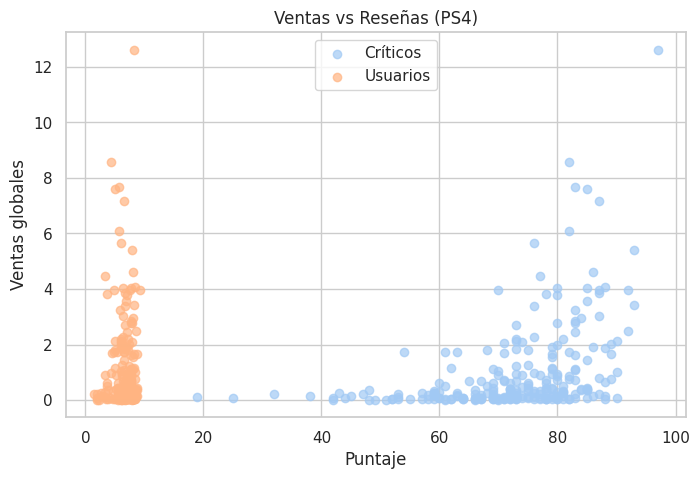

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(ps4_games['critic_score'], ps4_games['total_sales'], label='Críticos', alpha=0.7)
plt.scatter(ps4_games['user_score'], ps4_games['total_sales'], label='Usuarios', alpha=0.7)
plt.title('Ventas vs Reseñas (PS4)')
plt.xlabel('Puntaje')
plt.ylabel('Ventas globales')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

El gráfico muestra que tanto las reseñas de críticos como las de usuarios tienen una relación débil con las ventas, algunos juegos muy vendidos con puntuaciones medias, y juegos biien puntuados que no vendieron mucho. Esto quiere decir que las reseñas influyen, pero no es el factor mas importante al momento de la calificacion final.

In [28]:
ps4_games_clean = games[games['platform'] == 'PS4'].copy()

In [29]:
user_corr = ps4_games_clean['user_score'].corr(ps4_games_clean['total_sales'])
print("Correlación entre reseñas de usuarios y ventas:", round(user_corr, 3))

Correlación entre reseñas de usuarios y ventas: -0.045


In [30]:

game_counts = games['name'].value_counts()
multi_platform_games = game_counts[game_counts > 1].index
multi_platform_df = games[games['name'].isin(multi_platform_games)]

sales_comparison = multi_platform_df.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
sales_comparison = sales_comparison.sort_values(by='name')

sales_comparison.head(10)

,name,platform,total_sales
0,Frozen: Olaf's Quest,3DS,0.59
1,Frozen: Olaf's Quest,DS,0.51
2,007: Quantum of Solace,DS,0.13
3,007: Quantum of Solace,PC,0.02
4,007: Quantum of Solace,PS2,0.43
5,007: Quantum of Solace,PS3,1.15
6,007: Quantum of Solace,Wii,0.65
7,007: Quantum of Solace,X360,1.48
8,007: The World is not Enough,N64,1.56
9,007: The World is not Enough,PS,0.92


In [31]:
genre_sales = games.groupby('genre')['total_sales'].sum().reset_index()
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)
genre_sales

,genre,total_sales
0,Action,1716.52
10,Sports,1309.67
8,Shooter,1041.36
7,Role-Playing,931.08
4,Platform,825.55
3,Misc,790.29
6,Racing,723.49
2,Fighting,442.66
9,Simulation,387.96
5,Puzzle,239.89


        PERFIL DE USUARIO PARA CADA REGION:

In [32]:
top_platforms_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

top_platforms_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

top_platforms_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [33]:
top_genres = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)
top_genres

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Name: total_sales, dtype: float64

In [34]:
rating_sales = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

rating_sales = rating_sales.sort_values(by='na_sales', ascending=False)  # Cambia a 'eu_sales' o 'jp_sales' si quieres
rating_sales

,rating,na_sales,eu_sales,jp_sales
1,E,1274.24,703.87,197.96
7,T,747.60,421.79,150.70
5,M,742.89,480.00,63.58
2,E10+,345.50,183.35,40.20
4,K-A,2.56,0.27,1.46
3,EC,1.53,0.11,0.00
0,AO,1.26,0.61,0.00
6,RP,0.00,0.03,0.00


              PRUEBA LA HIPOTESIS:

In [40]:
from scipy.stats import ttest_ind
from scipy.stats import levene, ttest_ind

xone_scores = games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score']
pc_scores = games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score']

stat_levene, p_levene = levene(xone_scores,pc_scores)
equal_var = p_levene > 0.05 
print("P-valor levene:", p_levene)
if equal_var:
    print("las varianzas son iguales (equal_var=True)")
else:
    print("las varianzas son iguales (equal_var=False)")
    
stat1, pval1 = ttest_ind(xone_scores, pc_scores, equal_var=equal_var)

print("P-valor:", pval1)
if pval1 < 0.05:
    print("Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa.")

P-valor levene: 0.07610423950006148
las varianzas son iguales (equal_var=True)
P-valor: 3.0500850678177977e-05
Rechazamos la hipótesis nula: hay diferencia significativa.


In [36]:
action_scores = games[(games['genre'] == 'Action') & (games['user_score'].notnull())]['user_score']
sports_scores = games[(games['genre'] == 'Sports') & (games['user_score'].notnull())]['user_score']

stat2, pval2 = ttest_ind(action_scores, sports_scores)

print("P-valor:", pval2)
if pval2 < 0.05:
    print("Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa.")

P-valor: 0.12360284127621433
No se rechaza la hipótesis nula: no hay diferencia significativa.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xone_scores, pc_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Se evaluaron las 2 Hipotesis tanto la nula como la alternativa y se utilizo un criterio de 0.05

en la hiòtesis nula las calificaiones promedio son casi iguales.

en la hipotesis alternativa la calificacion de usuarion son diferentes 

por lo tanto no se rechaza la hipotesis nula no hay diferencias significativas entre ambas plataformas.

         CONCLUSION GENERAL DEL PROYECTO
 
 En este proyecto se realizo un analisis completo de un Dataset de videojuegos con el objetivo de comprender el comportamiento del mercado en las distintas plataformas de genero y region.
  Se empezo con la limpieza y preparacion de datos en la que se corrigieron tipos de datos, valores duplicados ausentes y se crearon columnas adicionales.
  posterior a eso se llevo un analis meticuloso
  en cuanto a ventas generos mas retanbles y graficos a distribucion.
  Las plataformas con mayor volumen de ventas fueron PS4, XOne y 3DS, aunque sus niveles de éxito variaron según la región. Por ejemplo, Japón muestra una fuerte preferencia por consolas de Nintendo, mientras que en Norteamérica y Europa dominan las consolas de Sony y Microsoft.
	•	Los géneros más rentables a nivel global fueron Action, Sports y Shooter. No obstante, géneros como Role-Playing tuvieron mayor peso en Japón.
	•	La clasificación ESRB afecta las ventas regionales: los juegos con clasificación “M” (Mature) se venden bien en NA y EU, pero tienen mucho menor impacto en JP, donde predominan juegos con clasificaciones más familiares como “E”.
	•	En las pruebas de hipótesis, se encontró que:
	•	No hay diferencia significativa entre las calificaciones promedio de los usuarios en Xbox One y PC.
	•	Sí hay una diferencia significativa entre las calificaciones de los géneros de Acción y Deportes.

para culminar, se obtuvo un vision clara del comportamiento del mercado considerando los aspectos mas importantes como ventas plataformas generos, donde se tomo como punto focal las preferecias del publico, este tipo de analisis puede ser muy util para tomar decisiones estrategicas en desarrollo marketing y la distribución de los videojuegos.